# O(2) - Model , J Engels et al PhyLettB 2000

In [3]:
# import ising_lib
# from imp import reload 
# reload(ising_lib)
from ising_lib import *
from numpy import *
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import *

def variance(X):
    return var(X)
def Average(X):
    return average(X)
def analyze(temparature,L,E,M):
    en,en_err=jacknife(E,Average)
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err],[en,en_err]

def leniar_fn(x,a,b):
    return a*x+b

def quadratic_fn(x,a,b,c):
    return a*x*x+b*x+c

def read_analyzed_data(fname):
        f=open(fname,'r')
        analysis_vals=dict()
        l=f.readline()
        item_list=l[1:-1].split(',')
        the_dict={it:[] for it in item_list}
        l=f.readline()
        i=0
        while l:
            if l[0]=='#':
                l=f.readline()
                continue
            i+=1
            try:
                it=l[:-1].split(',')
        #         print(it)
                L=float(it[1])
                J=float(it[4])
                H0=float(it[5])
                if L not in analysis_vals.keys():
                    analysis_vals.update({L:dict()})
                if J not in analysis_vals[L].keys():
                    analysis_vals[L].update({J:dict()})
                if H0 not in analysis_vals[L][J].keys():
                    analysis_vals[L][J].update({H0:dict(the_dict)})
                for val,end_key in zip(it,item_list):
                    analysis_vals[L][J][H0][end_key]=float(val)
                l=f.readline()
            except:
                print(it)
                l=f.readline()
        f.close()
        print(i ," DATA LINES READ")
        return analysis_vals
    
def read_generic_data(fname):
    f=open(fname,'r')
    X=True
    while(X):
        X=False
        l=f.readline()
        item=l[:-1].split(",")
        extracted_vals={it:[] for it in item}
        l=f.readline()
        i=0
        while l:
            i+=1
            if '#' in l[0:5]:
                l=f.readline()
                continue
            try:
                it=l[:-1].split(',')
                for item,key in zip(it,list(extracted_vals.keys())):
                        try:
                            extracted_vals[key].append(float(item))
                        except:
                            extracted_vals[key].append(item)
                l=f.readline()
            except:
                print(it)
                l=f.readline()
        f.close()
        print(i ," DATA LINES READ")
        return extracted_vals
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1
vc=nu/(beta*delta)
Tc=1/0.454165

## Ploting Basic Version of scaling function

In [4]:
f=read_generic_data('../extracted_data/o2analysis/analysis_full')
analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/analysis_full')

638  DATA LINES READ
[' ']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat'

### For Individual lattice sizes

In [5]:
T0=B**(-1/beta)

NameError: name 'B' is not defined

In [6]:
T0=1.18
H0_amp=1.11
H0_finite_size={48:0.0005,36:0.001,24:0.002}

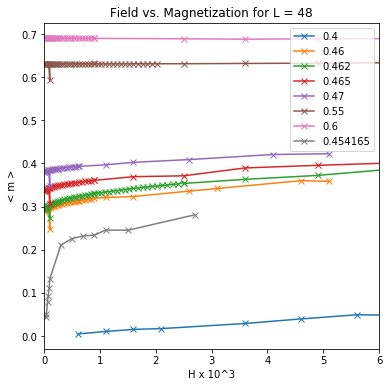

In [7]:
L0=48
while True:
    plt.figure(figsize=(6,6))
    i=0
    X_fit=[]
    Y_fit=[]
    Y_fit_err=[]
    J_fit=[]
    L_fit=[]
    for L in [L0]:
        for J in analyzed_vals[L].keys():
    #         if J==0.4:
    #             continue
            X=[]
            Y=[]
            Y_err=[]
            for H0 in analyzed_vals[L][J].keys():
                X.append((H0))
                Y.append(analyzed_vals[L][J][H0]['M0'])
                Y_err.append(analyzed_vals[L][J][H0]['M0_err'])
            for i in X:
                J_fit.append(J)
                L_fit.append(L)
                X_fit.append(sqrt(i))
            for i in Y:
                Y_fit.append(i)        
            for i in Y_err:
                Y_fit_err.append(i)
            i+=1
            N=argsort(X)
            X2=[X[i]*1000 for i in N]
            Y2=[Y[i] for i in N]
            Y2_err=[Y_err[i] for i in N]
            plt.plot(X2,Y2,marker='x',label=str(J)) 
    #         plt.xlim([0,0.16]) 
    plt.rcParams.update({'font.size': 10})
    plt.title("Field vs. Magnetization for L = "+str(L))
    # plt.rcParams.update({'font.size': 20})
    plt.xlabel('H x 10^3')
    plt.ylabel('< m >')
    plt.xlim([0,6])
    plt.rcParams.update({'font.size': 10})
    plt.legend(loc=1)
    plt.savefig("../extracted_data/final_presentation/FvsM_48png")
    plt.savefig("../extracted_data/o2analysis/FvsM_48.png")
    break

-0.5291522522746697 1.0762839277095573 0.01
-0.6002255653883037 1.0983609592385055 0.0081
-0.3257955677122808 1.0071841922000984 0.0225
-0.38662040641687445 1.0311526000540596 0.0169
-0.4254673514984534 1.0386974191852851 0.0144
-2.2337455153211456 1.444203411676048 0.0009
-1.5833810539382855 1.3202306619202464 0.0016
-1.2124515019916127 1.251229984363126 0.0025
-0.8107184839448026 1.1394660455593075 0.0049
-0.9748773196280831 1.1846409051083264 0.0036
-0.47213681686477826 1.0582285679141568 0.0121
-0.3538232341956929 1.0227320497609085 0.0196
-0.6910376617326175 1.126132913749166 0.0064
-3.0694749873069864 1.5571706969553412 0.000529
-2.917123136446559 1.5359538944964288 0.000576
-2.7781014601420555 1.5160746370102507 0.0006250000000000001
-2.6507776180921265 1.4974043931251015 0.0006760000000000002
-2.533772008157818 1.4798311964049984 0.0007290000000000002
-2.425911034182741 1.4632569946780616 0.0007840000000000001
-2.3261903234513395 1.447595500714155 0.0008410000000000001
-2.23374

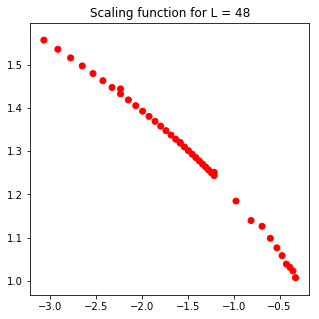

In [8]:
X=[]
Y=[]
Y_err=[]
col=[]
cdict={48:'b',24:'g',36:'r'}
plt.figure(figsize=(5,5))
cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}
L0=48
for i in range(len(f['T'])):
    if f['L'][i]!=L0 :
        continue      
    if f['J'][i]!=0.462 :
        continue  
    if f['H0'][i]<H0_finite_size[L]:
        continue
    h=f['H0'][i]/(H0_amp)
    t=(1/f['J'][i] - Tc)/T0
    if abs(t)<1e-8:
        continue
    temp=t/h**(1/(beta*delta))
    temp1=f['M0'][i]/(h**(1/delta))
    print(temp,temp1,f['H0'][i])
    X.append(temp)
    Y.append(temp1)
    Y_err.append(f['M0_err'][i]/(1/h**(1/delta)))
#     col.append(cdict[f['L'][i]])
    col.append(cdict_temp[f['J'][i]])
print("cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}")
plt.scatter(X,Y,c=col)
plt.title("Scaling function for L = "+str(L))
# plt.xlim([-7.5,2.5])
# plt.ylim([1,2])


        finite size effects starts to be non negligible for H < 0.001 they needs to be removed from the analysis to extract the scaling funtion.

## Combined Scaling function

cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}
cdict={48:'b',24:'g',36:'r'}


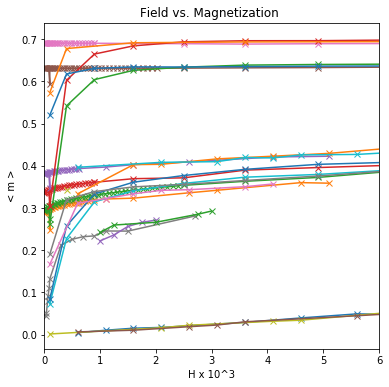

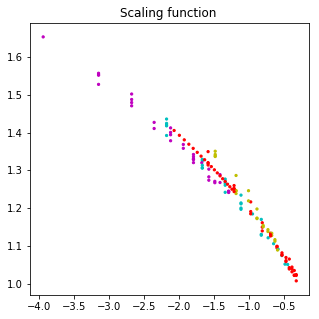

In [9]:
while True:
    plt.figure(figsize=(6,6))
    i=0
    X_fit=[]
    Y_fit=[]
    Y_fit_err=[]
    J_fit=[]
    L_fit=[]
    for L in [48,24,36]:
        for J in analyzed_vals[L].keys():
    #         if J==0.4:
    #             continue
            X=[]
            Y=[]
            Y_err=[]
            for H0 in analyzed_vals[L][J].keys():
                X.append(H0)
                Y.append(analyzed_vals[L][J][H0]['M0'])
                Y_err.append(analyzed_vals[L][J][H0]['M0_err'])
            for i in X:
                J_fit.append(J)
                L_fit.append(L)
                X_fit.append(sqrt(i))
            for i in Y:
                Y_fit.append(i)        
            for i in Y_err:
                Y_fit_err.append(i)
            i+=1
            N=argsort(X)
            X2=[X[i]*1000 for i in N]
            Y2=[Y[i] for i in N]
            Y2_err=[Y_err[i] for i in N]
            plt.plot(X2,Y2,marker='x',label=str(J)) 
    #         plt.xlim([0,0.16]) 
    plt.rcParams.update({'font.size': 10})
    plt.title("Field vs. Magnetization ")
    # plt.rcParams.update({'font.size': 20})
    plt.xlabel('H x 10^3')
    plt.ylabel('< m >')
    plt.xlim([0,6])
    plt.rcParams.update({'font.size': 10})
#     plt.legend(loc=1)
#     plt.savefig("../extracted_data/final_presentation/FvsM_TOT.")
#     plt.savefig("../extracted_data/o2analysis/FvsM_TOT.png")
    X=[]
    Y=[]
    Y_err=[]
    col=[]
    cdict={48:'b',24:'g',36:'r'}
    plt.figure(figsize=(5,5))
    cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}
    for i in range(len(f['T'])):
#         if f['L'][i]!=48 :
#             continue  
        if f['H0'][i]<H0_finite_size[L]:
            continue
        if f['J'][i] not in[0.462,0.460,0.465,0.47]:
            continue
        h=f['H0'][i]/(H0_amp)
        t=(1/f['J'][i] - Tc)/T0
#         if abs(t)<1e-6:
#             continue
        temp=t/h**(1/(beta*delta))
        temp1=f['M0'][i]/(h**(1/delta))
        X.append(temp)
        Y.append(temp1)
        Y_err.append(f['M0_err'][i]/(1/h**(1/delta)))
#         col.append(cdict[f['L'][i]])
        col.append(cdict_temp[f['J'][i]])
    print("cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}")
    print("cdict={48:'b',24:'g',36:'r'}")
    plt.scatter(X,Y,c=col,s=5)
    plt.title("Scaling function ")
#     plt.xlim([-20,20])
#     plt.ylim([0,3])
    Xgri_fit,Ygri_fit=[],[]
    Xgri_fit_err,Ygri_fit_err=[],[]
    for i,j,k in zip(X,Y,Y_err):
        Xgri_fit.append(i/j**(1/beta))
        Ygri_fit.append(j**(-delta))
        Xgri_fit_err.append(k*(1/beta))
        Ygri_fit_err.append(k*(delta))
    break

In [10]:
def scaling_lt_fit(y,a,b):
#     print(y,a,b,c)a
    return a*y+b*sqrt(y)+0*y**1.5 -1

In [11]:
X_fit2,Y_fit2=[],[]
X_fit2_err=[]
for i,j,k in zip(Xgri_fit,Ygri_fit,Xgri_fit_err):
    if i<-1.001or i>-0.0001:
        continue
    X_fit2.append(i)
    Y_fit2.append(j)
    X_fit2_err.append(k)
val,err=curve_fit(scaling_lt_fit,Y_fit2,X_fit2)
delY=[((i-scaling_lt_fit(j,val[0],val[1]))/1)**2 for i,j,k in zip(X_fit2,Y_fit2,X_fit2_err)]
print("chi-square without errorB: ", sum(delY)/(len(delY)-2))
delY=[((i-scaling_lt_fit(j,val[0],val[1]))/k)**2 for i,j,k in zip(X_fit2,Y_fit2,X_fit2_err)]
print("chi-square : ", sum(delY)/(len(delY)-2),"\n")
# print(val,"\n",sqrt(abs(err)))
print("literature vals : c̃ 1 + d̃ 3 = 0.352(30)")
print("c1+d3 = ",val[0]," +/- ",sqrt(err[0][0]))
print()
print("c2 = ",val[1]," +/- ",sqrt(err[1][1]))
print("literature vals c̃ 2 = 0.592(10)")

chi-square without errorB:  0.0019252035175007078
chi-square :  429616.7395227581 

literature vals : c̃ 1 + d̃ 3 = 0.352(30)
c1+d3 =  0.4495486976227712  +/-  0.03499888391096596

c2 =  0.31189026976779993  +/-  0.025133667964446098
literature vals c̃ 2 = 0.592(10)


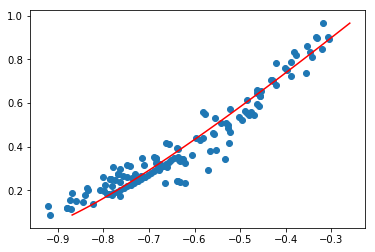

In [12]:
y=linspace(min(Y_fit2),max(Y_fit2),100)
x=[scaling_lt_fit(i,val[0],val[1]) for i in y]
plt.plot(x,y,c='r')
plt.scatter(X_fit2,Y_fit2)

## Extration of Scaling Funtion

In [116]:
analyzed_vals=read_analyzed_data('../extracted_data/GS_analysis/analysis_scaling')
M,M_err,H,J=[],[],[],[]
for L in analyzed_vals.keys():
    for _J in analyzed_vals[L].keys():
        for H0 in analyzed_vals[L][_J].keys():
            M.append(analyzed_vals[L][_J][H0]['M0'])
            M_err.append(analyzed_vals[L][_J][H0]['M0_err'])
            J.append(_J)
            H.append(H0)
T=[1/i for i in J]
f=open('../extracted_data/GS_analysis/fit_raw_data','w')
f.write('#T,H,M,M_err\n')
for a,b,c,d in zip(T,H,M,M_err):
    f.write(str(a)+","+str(b)+","+str(c)+","+str(d)+'\n')
f.close()

T0=1.18
H0=1.11
Tc=1/0.454165
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1
h1=[i/H0 for i in H]
t1=[(i-Tc)/T0 for i in T]
X1=[i*j**(-1/(beta*delta)) for i,j in zip(t1,h1)]
arg=argsort(X1)
X,t,h=[],[],[]
for i in arg:
    X.append(X1[i])
    t.append(t1[i])
    h.append(h1[i])
lis=[]
for i in range(len(X)-1):
    if X[i]==X[i+1]:
        if t[i]==t[i+1]:
            if h[i]==h[i+1]:
                lis.append(i+1)
                print(i,end=",")
lis.sort(reverse=True)
for i in lis:
    X.pop(i)
    h.pop(i)
    t.pop(i)
f=open('../extracted_data/GS_analysis/val.txt','w')
for i in range(len(X)):
    f.write(str(X[i])+','+str(t[i])+','+str(h[i])+'\n')
f.close()

441  DATA LINES READ
0,2,3,5,7,9,10,12,14,15,17,19,21,23,24,26,27,29,30,32,33,35,37,39,41,42,45,47,49,50,52,53,55,56,58,59,61,62,64,66,68,69,71,72,74,76,78,79,81,83,85,86,88,89,91,93,94,96,98,99,101,102,104,106,107,109,110,112,113,115,117,118,120,122,124,125,127,129,130,132,134,135,137,139,141,142,144,146,148,149,151,153,154,156,157,159,160,162,164,165,167,168,170,171,173,175,176,178,179,182,183,185,186,188,189,191,193,194,196,197,199,200,203,204,206,207,210,211,213,214,216,217,221,222,224,225,228,229,231,232,235,236,238,239,241,242,244,245,247,248,250,251,253,254,256,257,259,260,262,263,283,285,287,289,291,293,295,297,299,301,303,305,308,310,312,314,316,318,320,322,324,327,

In [2]:
T0=1.18
H0=1.11
Tc=1/0.454165
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1

## Binders Analysis

In [9]:
analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/analysis_full')

[' ']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUC

In [10]:
analyzed_vals[24][0.462][0.0001].keys()

dict_keys(['dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err'])

In [19]:
i=0
binder_data=dict()
for L in analyzed_vals.keys():
    if L not in binder_data.keys():
        binder_data.update({L:dict()})
    for J in analyzed_vals[L].keys():
        for H0 in analyzed_vals[L][J].keys():
            if H0 not in binder_data[L].keys():
                binder_data[L].update({H0:{'J':[],'bc':[],'bc_err':[]}})
#             print('adding ',J,' to ',H0,L)
            binder_data[L][H0]['J'].append(J)
            binder_data[L][H0]['bc'].append(analyzed_vals[L][J][H0]['M0_Bc'])
#             print(binder_data[L][H0]['bc'][-1])
            binder_data[L][H0]['bc_err'].append(analyzed_vals[L][J][H0]['M1_Bc_err'])
        i+=1


In [20]:
H0_list=list(binder_data[24].keys())

/home/aravind/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


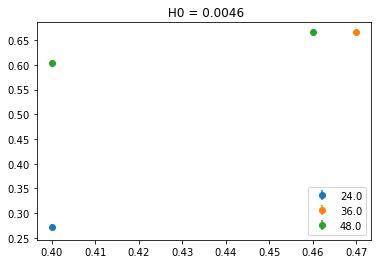

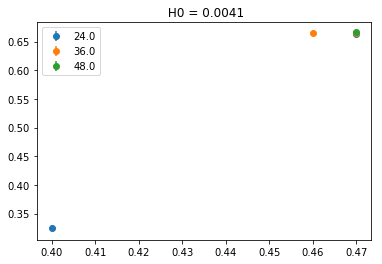

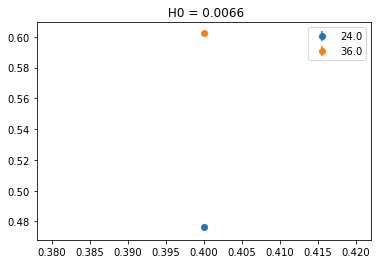

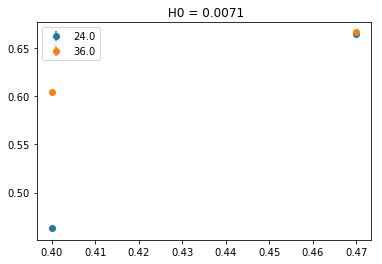

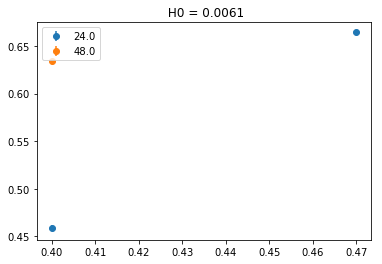

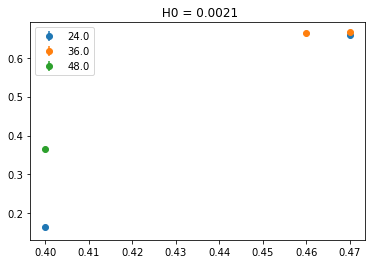

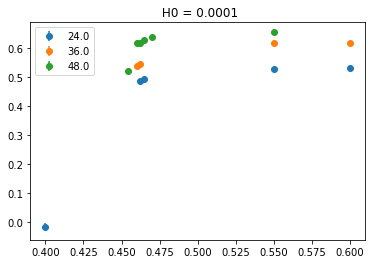

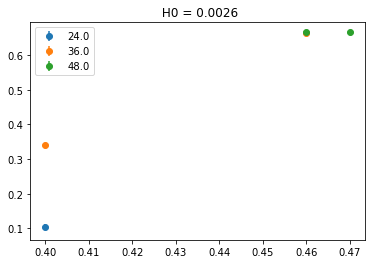

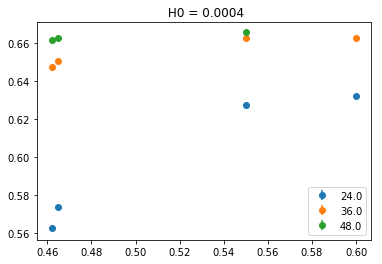

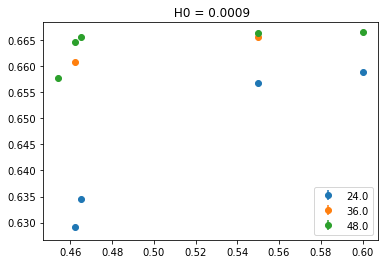

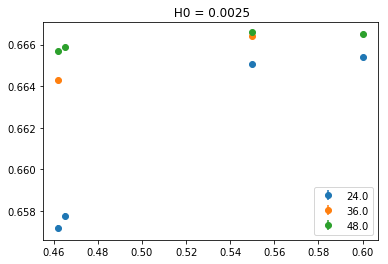

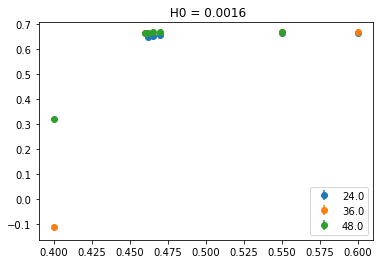

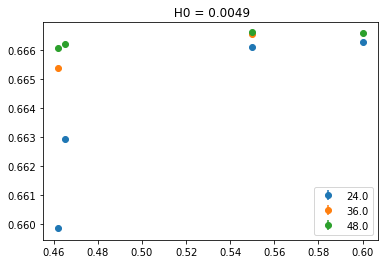

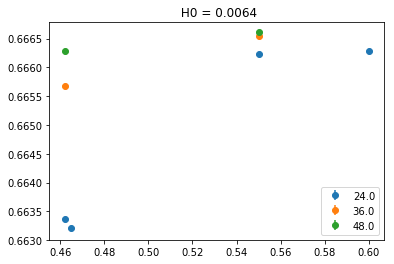

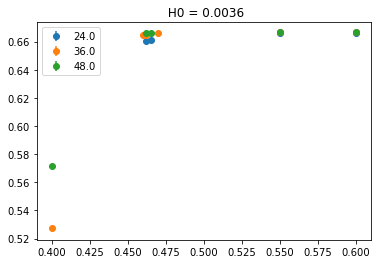

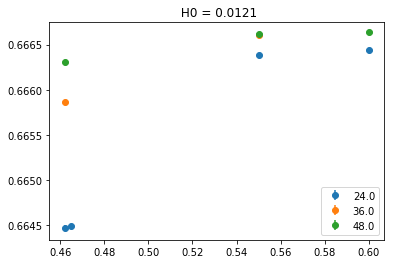

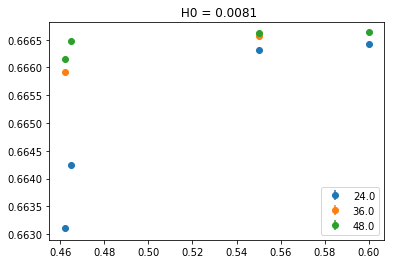

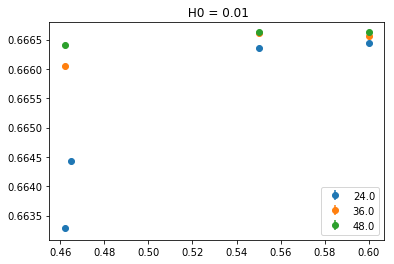

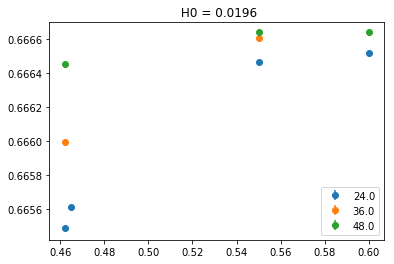

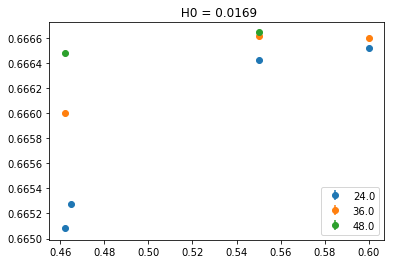

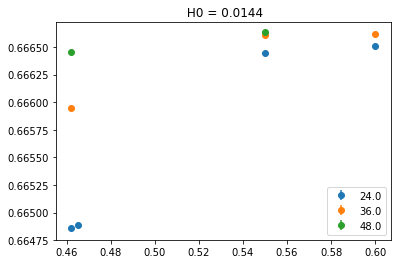

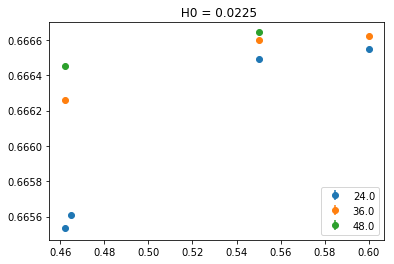

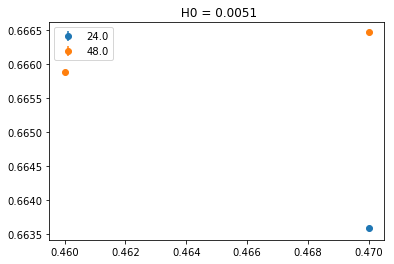

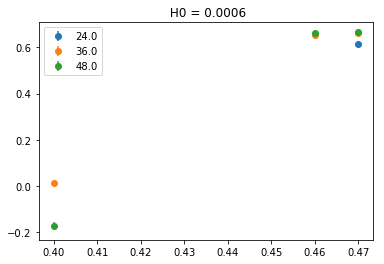

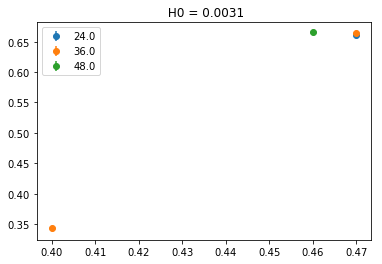

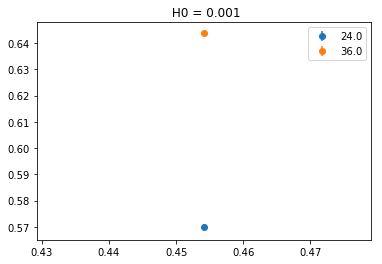

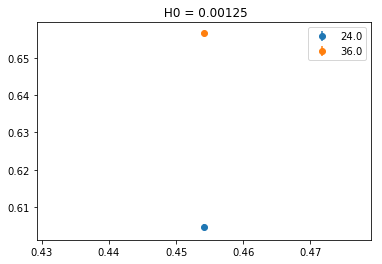

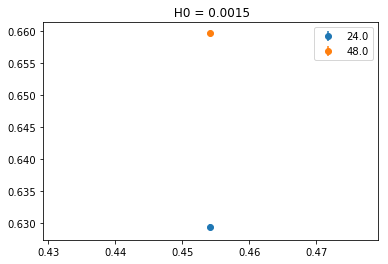

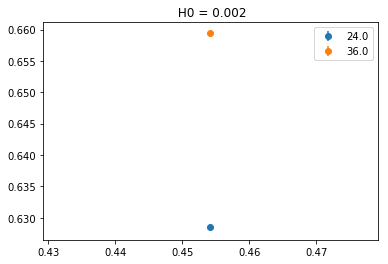

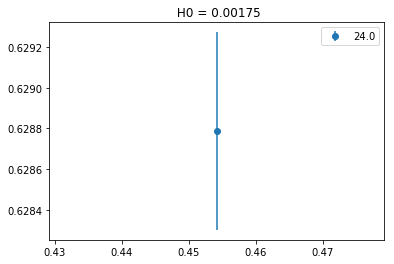

In [24]:
for H0 in H0_list:
    plt.figure()
    for L in binder_data.keys():
        if H0 in binder_data[L].keys():
            Y=[i for i in binder_data[L][H0]['bc']]
            Y_err=[i for i in binder_data[L][H0]['bc_err']]
            X=[i for i in binder_data[L][H0]['J']]
            N=argsort(X)
            X2=[X[i] for i in N]
            Y2=[Y[i] for i in N]
            Y2_err=[Y_err[i] for i in N]
            plt.errorbar(X2,Y2,Y2_err,label =str(L),fmt='o')
    plt.legend(loc=0)
    plt.title(' H0 = '+str(H0))

In [26]:
# plt.figure(figsize=(10,10))
i=0
X_fit=[]
Y_fit=[]
# f,ax=plt.subplots(ncols=3,nrows=1)
# axis={24:ax[0],36:ax[1],48:ax[2]}

for J in analyzed_vals[24].keys():
    plt.figure()
    X=[]
    Y=[]
    Y_err=[]
    col=[]
    k=0
    for L in [24,36,48]:
        k+=1
        if J not in analyzed_vals[L].keys():
            continue
        for H0 in analyzed_vals[L][J].keys():
            X.append(sqrt(H0))
            Y.append(analyzed_vals[L][J][H0]['M0_Bc'])
            Y_err.append(analyzed_vals[L][J][H0]['M0_Bc_err'])
            col.append(k)
            
    i+=1
    plt.title(str(J))
    plt.scatter(X,Y,c=col) 
    plt.xlim([0,0.16]) 
#     plt.legend(loc=0)

KeyError: 'M0_Bc_err'

## Phase and time history analysis @ Meeting

In [26]:
dat=get_data_xyModel(fnames[0])

In [28]:
tag_name='N16_RG_sbf_MIX'
BASE_FOLDER='../simulation_data/raw/'+tag_name+'/'
f=open(BASE_FOLDER+"fnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  8


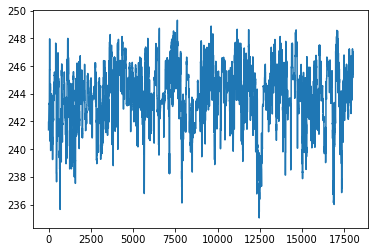

In [31]:
datMCS=get_data_xyModel(fnames[1])
n0=0
n=-1
plt.plot(datMCS['time'][n0:n],datMCS['magentization'][n0:n])

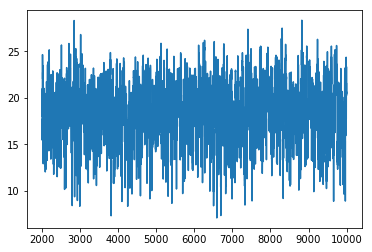

In [79]:
datW=get_data_xyModel(fnames[0])
n0=2000
n=10000
plt.plot(datW['time'][n0:n],datW['energy'][n0:n])

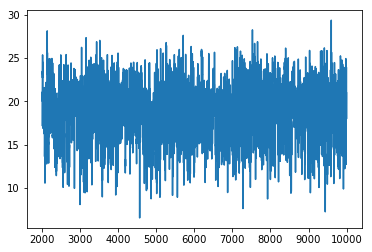

In [83]:
datMIX=get_data_xyModel(fnames[0])
n0=2000
n=10000
plt.plot(datMIX['time'][n0:n],datMIX['energy'][n0:n])

In [67]:
ang=[i*2*pi/400-pi for i in range(400)]
c4=[cos(4*i) for i in ang]
c8=[cos(8*i) for i in ang]

In [68]:
a=0.06
b=0.15

(-0.7853981633974483, 0.7853981633974483)

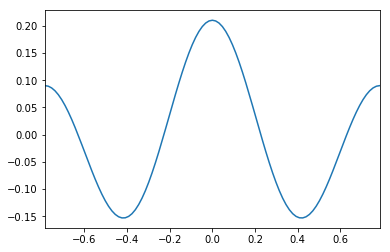

In [69]:
x=ang
y=[a*i+b*j for i,j in zip(c4,c8)]
plt.plot(x,y)
plt.xlim([-pi/4,pi/4])

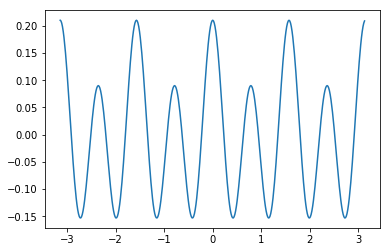

In [70]:
plt.plot(x,y)

In [105]:
tag_name='N08_xy'
BASE_FOLDER='../simulation_data/raw/'+tag_name+'/'
f=open(BASE_FOLDER+"fnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  15


In [106]:
 dat=get_data_xyModel(fnames[0]);

In [84]:
fnames

['../simulation_data/raw/N08_xy/L_8_T_0.250_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.370_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.490_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.610_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.730_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.850_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.970_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.090_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.210_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.330_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.450_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.570_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.690_J_1.000_

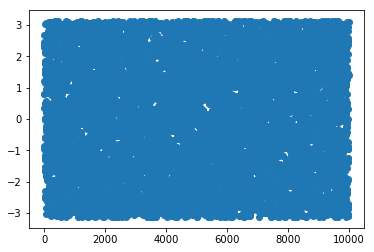

In [107]:
n0=0
n=10000
phase_hist=[arctan2(j,i) for i,j in zip(dat['magentization_x'][n0:n],dat['magentization_y'][n0:n])]
plt.scatter(dat['time'][n0:n],phase_hist)

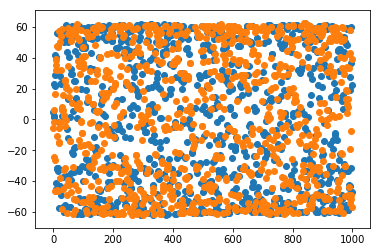

In [85]:
n0=0
n=1000
plt.scatter(dat['time'][n0:n],dat['magentization_y'][n0:n])
# plt.figure()
plt.scatter(dat['time'][n0:n],dat['magentization_x'][n0:n])

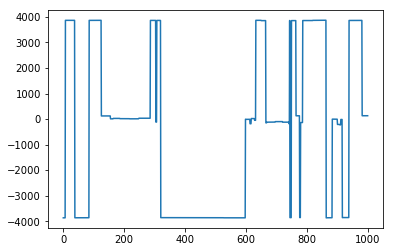

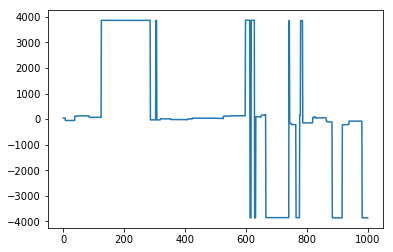

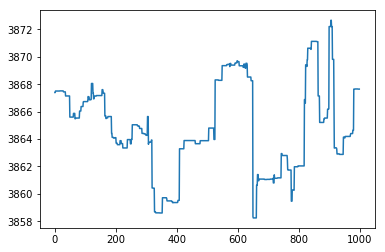

In [91]:
n0=0
n=1000
plt.plot(dat['time'][n0:n],dat['magentization_y'][n0:n])
plt.figure()
plt.plot(dat['time'][n0:n],dat['magentization_x'][n0:n])
plt.figure()
plt.plot(dat['time'][n0:n],dat['magentization'][n0:n])
